In [5]:
%load_ext autoreload

In [6]:
%autoreload 2
%aimport AD_predictor_tools
%aimport AD_comparison_tools


%aimport PlottingTools
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme()
import protfasta
warnings.filterwarnings('ignore')
from matplotlib.ticker import PercentFormatter
from scipy.stats import ks_2samp
sns.set(style = "ticks", rc={'figure.figsize':(6.5,4)}, font_scale = 1)
import matplotlib.ticker as mtick
import math

In [7]:

from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

In [8]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [16]:
knownADs = pd.read_csv("../output/known_ADs_considering_isoforms_and_canonical.csv")
knownADs = knownADs[knownADs["TileType"] == "TF"]
knownADs["Length"] = knownADs["ProteinRegionSeq"].str.len()
knownADs

,Gene,Start,End,uniprotID,Matching Isoforms,Canonical Transcript ID,orig_uniprotID,Reference,TileType,ProteinRegionSeq,Notes,Length
1,AEBP1,1088,1158,Q8IUX7,[['Q8IUX7']],NaN,Q8IUX7,Staller Activity Data,TF,EVVTEFGTEVEPEFGTKVEPEFETQLEPEFETQLEPEFEEEEEEEK...,NaN,71
2,AHCTF1,1445,1698,Q8WYP5,"[['Q8WYP5'], ['Q8WYP5']]",nan / nan,Q8WYP5 / Q8WYP5,"PMID: 11952839, Soto / transcriptionalactivity...",TF,IRANDNKSMADVLGDGGNSSLTISEGPIVSERRLNQEVALNLKEDH...,NaN,254
3,AHR,118,126,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,LLQALNGFV,NaN,9
4,AHR,266,268,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,FAI,NaN,3
5,AHR,532,848,P35869,"[['P35869'], ['P35869'], ['P35869']]",ENST00000242057 / nan / ENST00000242057,P35869 / P35869 / P35869,"DelRosso et al. / PMID: 8794892, Soto / DelRos...",TF,QDSKNSDLYSIMKNLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDL...,NaN,317
...,...,...,...,...,...,...,...,...,...,...,...,...
739,ZSCAN20,262,341,P17040,"[['P17040', 'P17040-3']]",ENST00000361328,P17040,DelRosso et al.,TF,PSNTSEKEQGPEFWGLSLINSGKRSTADYSLDNEPAQALTWRDSRA...,NaN,80
740,ZXDA,572,699,P98168,"[['P98168'], ['P98168']]",nan / nan,P98168 / P98168 / P98168,"PMID: 17493635, Soto / R4TA_regions.txt / acti...",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN,128
741,ZXDB,576,703,P98169,[['P98169']],NaN,P98169 / P98169,"R4TA_regions.txt / activation_regions.txt, GSL",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN,128
742,ZXDC,579,688,Q2QGD7,"[['Q2QGD7', 'Q2QGD7-2'], ['Q2QGD7', 'Q2QGD7-2']]",nan / nan,Q2QGD7 / Q2QGD7 / Q2QGD7,"PMID: 16600381, Soto / R4TA_regions.txt / acti...",TF,DSPLVLGTAATVLQQGSFSVDDVQTVSAGALGCLVALPMKNLSDDP...,NaN,110


In [19]:
for AA in ["D", "E", "R", "K"]:
    knownADs[AA] = knownADs["ProteinRegionSeq"].str.count(AA)
    # knownADs[AA] = knownADs["Sequence"].str.count(AA)
knownADs["charge"] =  - knownADs["D"] - knownADs["E"] + knownADs["R"] + knownADs["K"]
knownADs

,Gene,Start,End,uniprotID,Matching Isoforms,Canonical Transcript ID,orig_uniprotID,Reference,TileType,ProteinRegionSeq,Notes,Length,D,E,R,K,charge
1,AEBP1,1088,1158,Q8IUX7,[['Q8IUX7']],NaN,Q8IUX7,Staller Activity Data,TF,EVVTEFGTEVEPEFGTKVEPEFETQLEPEFETQLEPEFEEEEEEEK...,NaN,71,1,24,0,2,-23
2,AHCTF1,1445,1698,Q8WYP5,"[['Q8WYP5'], ['Q8WYP5']]",nan / nan,Q8WYP5 / Q8WYP5,"PMID: 11952839, Soto / transcriptionalactivity...",TF,IRANDNKSMADVLGDGGNSSLTISEGPIVSERRLNQEVALNLKEDH...,NaN,254,23,32,5,14,-36
3,AHR,118,126,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,LLQALNGFV,NaN,9,0,0,0,0,0
4,AHR,266,268,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,FAI,NaN,3,0,0,0,0,0
5,AHR,532,848,P35869,"[['P35869'], ['P35869'], ['P35869']]",ENST00000242057 / nan / ENST00000242057,P35869 / P35869 / P35869,"DelRosso et al. / PMID: 8794892, Soto / DelRos...",TF,QDSKNSDLYSIMKNLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDL...,NaN,317,17,18,4,11,-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,ZSCAN20,262,341,P17040,"[['P17040', 'P17040-3']]",ENST00000361328,P17040,DelRosso et al.,TF,PSNTSEKEQGPEFWGLSLINSGKRSTADYSLDNEPAQALTWRDSRA...,NaN,80,5,10,3,4,-8
740,ZXDA,572,699,P98168,"[['P98168'], ['P98168']]",nan / nan,P98168 / P98168 / P98168,"PMID: 17493635, Soto / R4TA_regions.txt / acti...",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN,128,11,4,1,0,-14
741,ZXDB,576,703,P98169,[['P98169']],NaN,P98169 / P98169,"R4TA_regions.txt / activation_regions.txt, GSL",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN,128,11,4,1,0,-14
742,ZXDC,579,688,Q2QGD7,"[['Q2QGD7', 'Q2QGD7-2'], ['Q2QGD7', 'Q2QGD7-2']]",nan / nan,Q2QGD7 / Q2QGD7 / Q2QGD7,"PMID: 16600381, Soto / R4TA_regions.txt / acti...",TF,DSPLVLGTAATVLQQGSFSVDDVQTVSAGALGCLVALPMKNLSDDP...,NaN,110,6,4,2,2,-6


In [20]:
acidic_knownADs = knownADs[knownADs["charge"] < -3]
acidic_knownADs

,Gene,Start,End,uniprotID,Matching Isoforms,Canonical Transcript ID,orig_uniprotID,Reference,TileType,ProteinRegionSeq,Notes,Length,D,E,R,K,charge
1,AEBP1,1088,1158,Q8IUX7,[['Q8IUX7']],NaN,Q8IUX7,Staller Activity Data,TF,EVVTEFGTEVEPEFGTKVEPEFETQLEPEFETQLEPEFEEEEEEEK...,NaN,71,1,24,0,2,-23
2,AHCTF1,1445,1698,Q8WYP5,"[['Q8WYP5'], ['Q8WYP5']]",nan / nan,Q8WYP5 / Q8WYP5,"PMID: 11952839, Soto / transcriptionalactivity...",TF,IRANDNKSMADVLGDGGNSSLTISEGPIVSERRLNQEVALNLKEDH...,NaN,254,23,32,5,14,-36
5,AHR,532,848,P35869,"[['P35869'], ['P35869'], ['P35869']]",ENST00000242057 / nan / ENST00000242057,P35869 / P35869 / P35869,"DelRosso et al. / PMID: 8794892, Soto / DelRos...",TF,QDSKNSDLYSIMKNLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDL...,NaN,317,17,18,4,11,-20
6,AIRE,292,545,O43918,[['O43918']],NaN,O43918,"PMID: 11274163, Soto",TF,HQKNEDECAVCRDGGELICCDGCPRAFHLACLSPPLREIPSGTWRC...,NaN,254,13,17,17,3,-10
8,AKAP8L,1,384,Q9ULX6,"[['Q9ULX6'], ['Q9ULX6'], ['Q9ULX6']]",nan / nan / ENST00000397410,Q9ULX6 / Q9ULX6 / Q9ULX6,"PMID: 11402034, Soto / activation_regions.txt,...",TF,MSYTGFVQGSETTLQSTYSDTSAQPTCDYGYGTWNSGTNRGYEGYG...,NaN,384,32,30,30,19,-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,ZNF687,2,81,Q8N1G0,"[['Q8N1G0', 'Q8N1G0-2']]",ENST00000324048,Q8N1G0,DelRosso et al.,TF,GDMKTPDFDDLLAAFDIPDIDANEAIHSGPEENEGPGGPGKPEPGV...,NaN,80,11,7,0,2,-16
739,ZSCAN20,262,341,P17040,"[['P17040', 'P17040-3']]",ENST00000361328,P17040,DelRosso et al.,TF,PSNTSEKEQGPEFWGLSLINSGKRSTADYSLDNEPAQALTWRDSRA...,NaN,80,5,10,3,4,-8
740,ZXDA,572,699,P98168,"[['P98168'], ['P98168']]",nan / nan,P98168 / P98168 / P98168,"PMID: 17493635, Soto / R4TA_regions.txt / acti...",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN,128,11,4,1,0,-14
741,ZXDB,576,703,P98169,[['P98169']],NaN,P98169 / P98169,"R4TA_regions.txt / activation_regions.txt, GSL",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN,128,11,4,1,0,-14


In [21]:
# acidic_knownADs.to_csv("../output/acidic_known_ADs_considering_isoforms_and_canonical.csv")

In [22]:
tiled_Lambert = pd.read_csv("../../AD_predictor_project/Paper_AD_predictor/AD_predictor/data/tiled_Lambert_with_AA_AllHydros.csv")
tiled_proteome = pd.read_csv("../../AD_predictor_project/Paper_AD_predictor/AD_predictor/data/tiled_proteome.csv.zip", low_memory = True)
tiled_predictions = pd.read_csv("../../AD_predictor_project/Paper_AD_predictor/AD_predictor/data/tiled_predictions_with_AA_AllHydros.csv")

In [34]:
tiled_known_ADs = AD_predictor_tools.makeTilingDF("../output/known_ADs_considering_isoforms_and_canonical.csv")
PlottingTools.add_AAcounts_and_allhydros(tiled_known_ADs)

Using existing Tiling DF at ../data/TilingDFs/known_ADs_considering_isoforms_and_canonical_size_39_space_1_AAs_W,F,Y,M,L,Q.csv


In [43]:
tiled_acidic_known_ADs = AD_predictor_tools.makeTilingDF("../output/acidic_known_ADs_considering_isoforms_and_canonical.csv")
PlottingTools.add_AAcounts_and_allhydros(tiled_acidic_known_ADs)

Using existing Tiling DF at ../data/TilingDFs/acidic_known_ADs_considering_isoforms_and_canonical_size_39_space_1_AAs_W,F,Y,M,L,Q.csv


Figure 4: Properties of known AD list.

a) Counts from each list

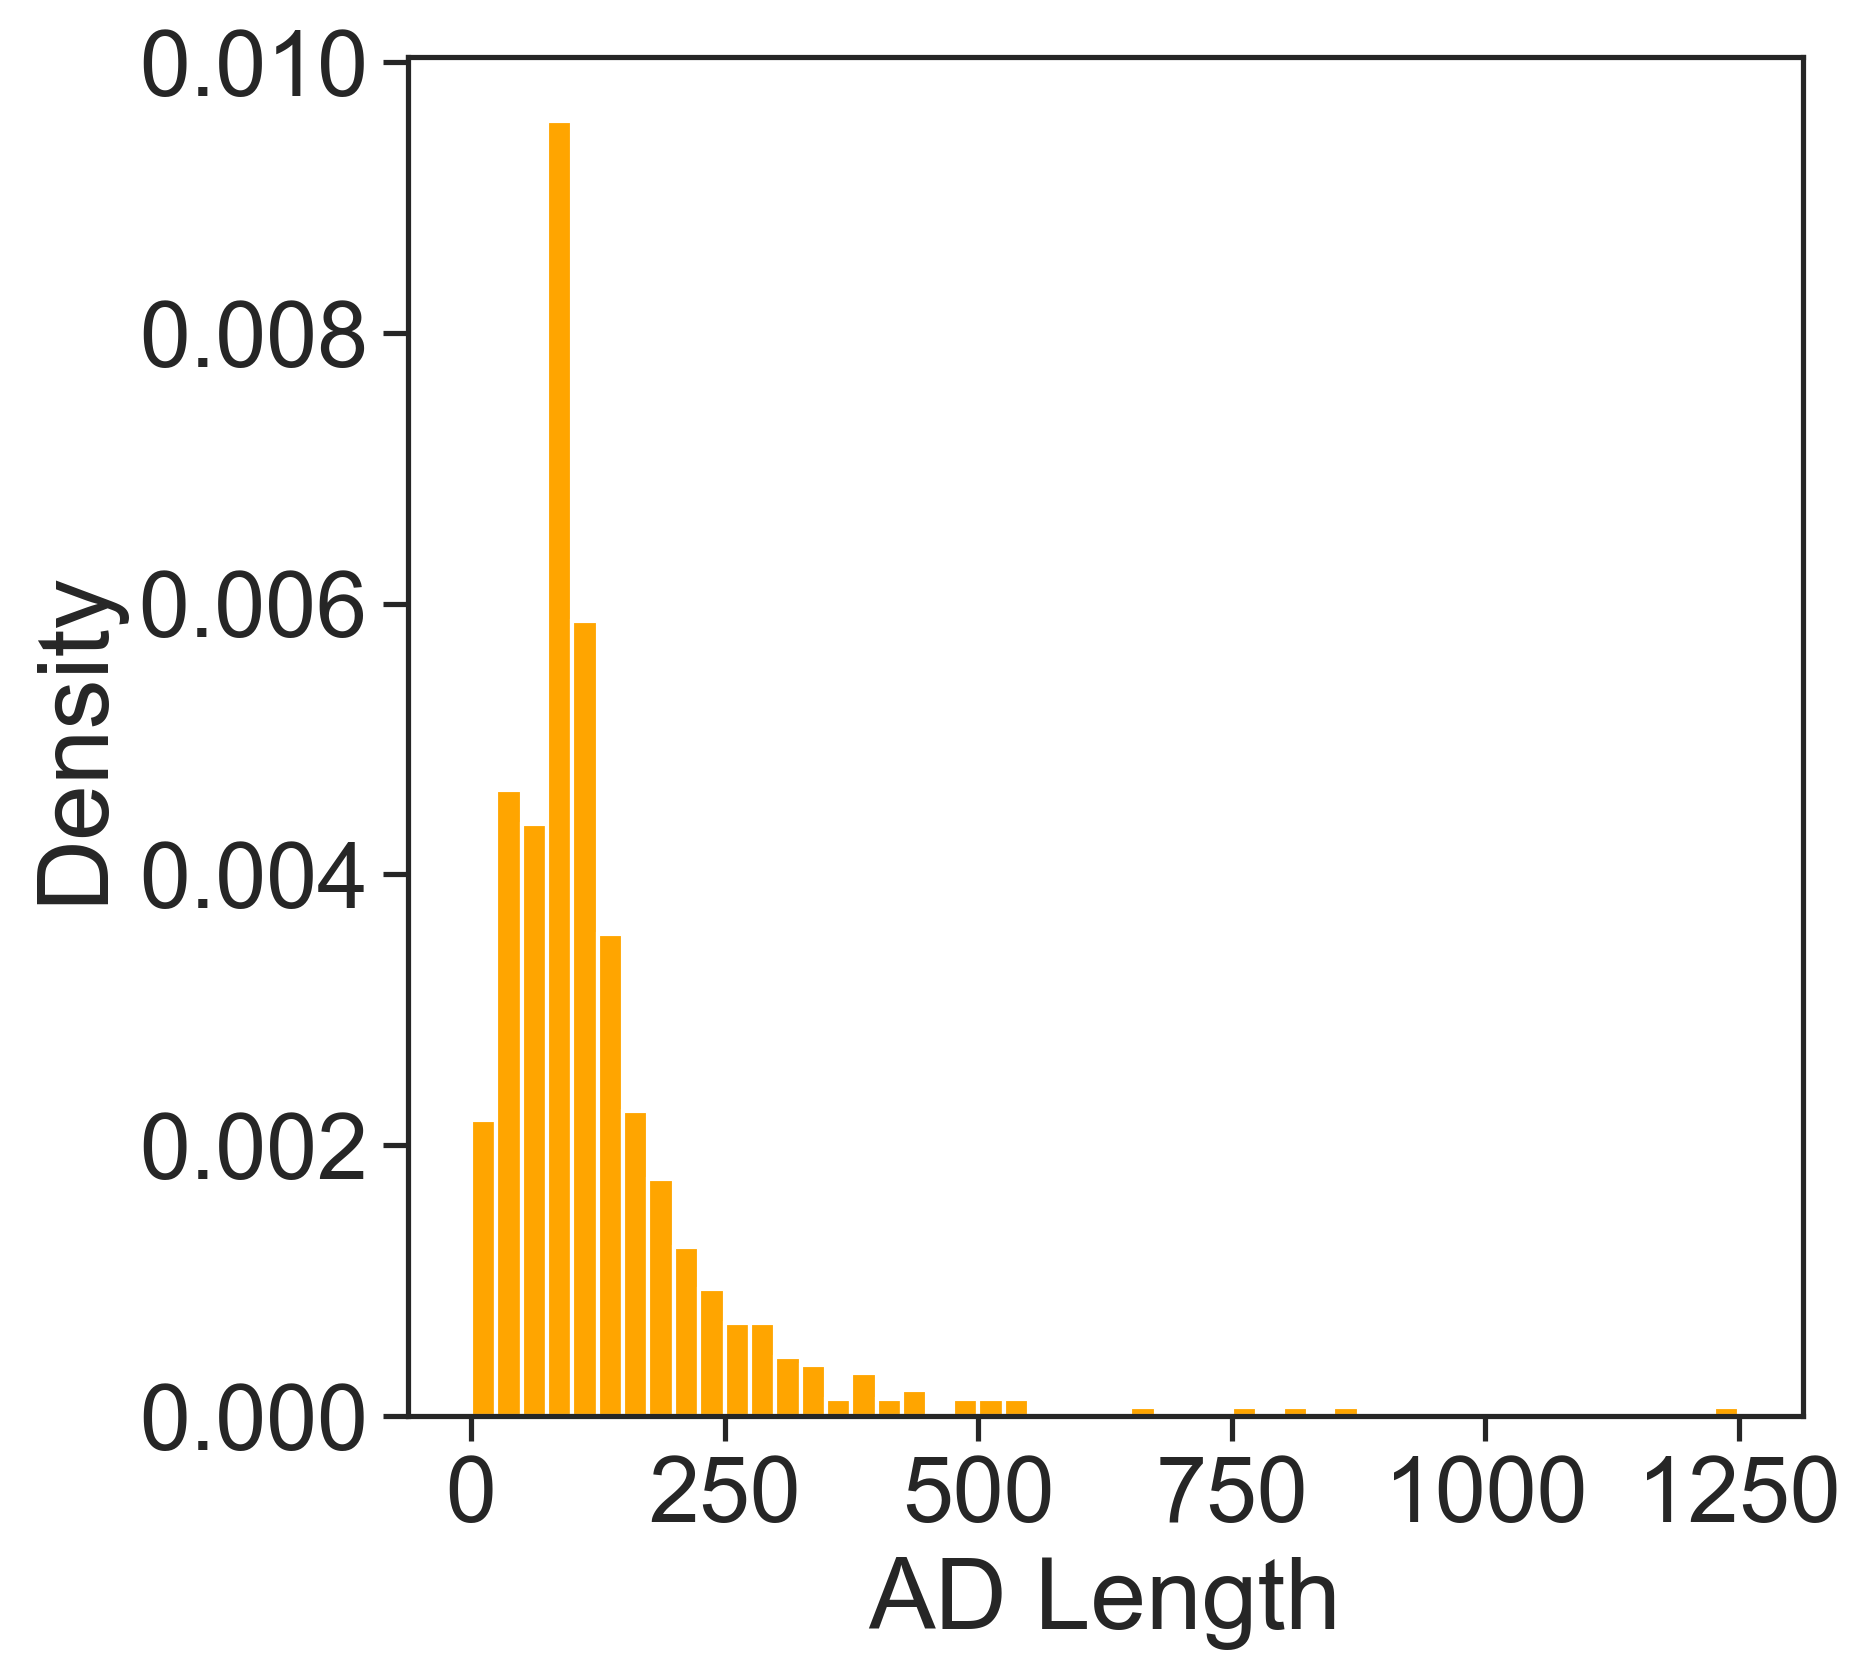

In [35]:
plt.figure(dpi=300, figsize=(6,6))
sns.set(style = "ticks", font_scale = 2)    

values = np.arange(0,max(knownADs['Length'])+25,25)
plt.hist(knownADs['Length'], bins=values, color = "Orange", alpha = 1, density = True)
plt.xlabel("AD Length")
plt.ylabel("Density")
#plt.title("Length")
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0)
      
plt.xticks(np.arange(0,max(knownADs['Length'])+250,250))
plt.savefig('Figures/fig1/length.png')
plt.show()

In [36]:
print(min(knownADs['Length']))
print(max(knownADs['Length']))

3
1248


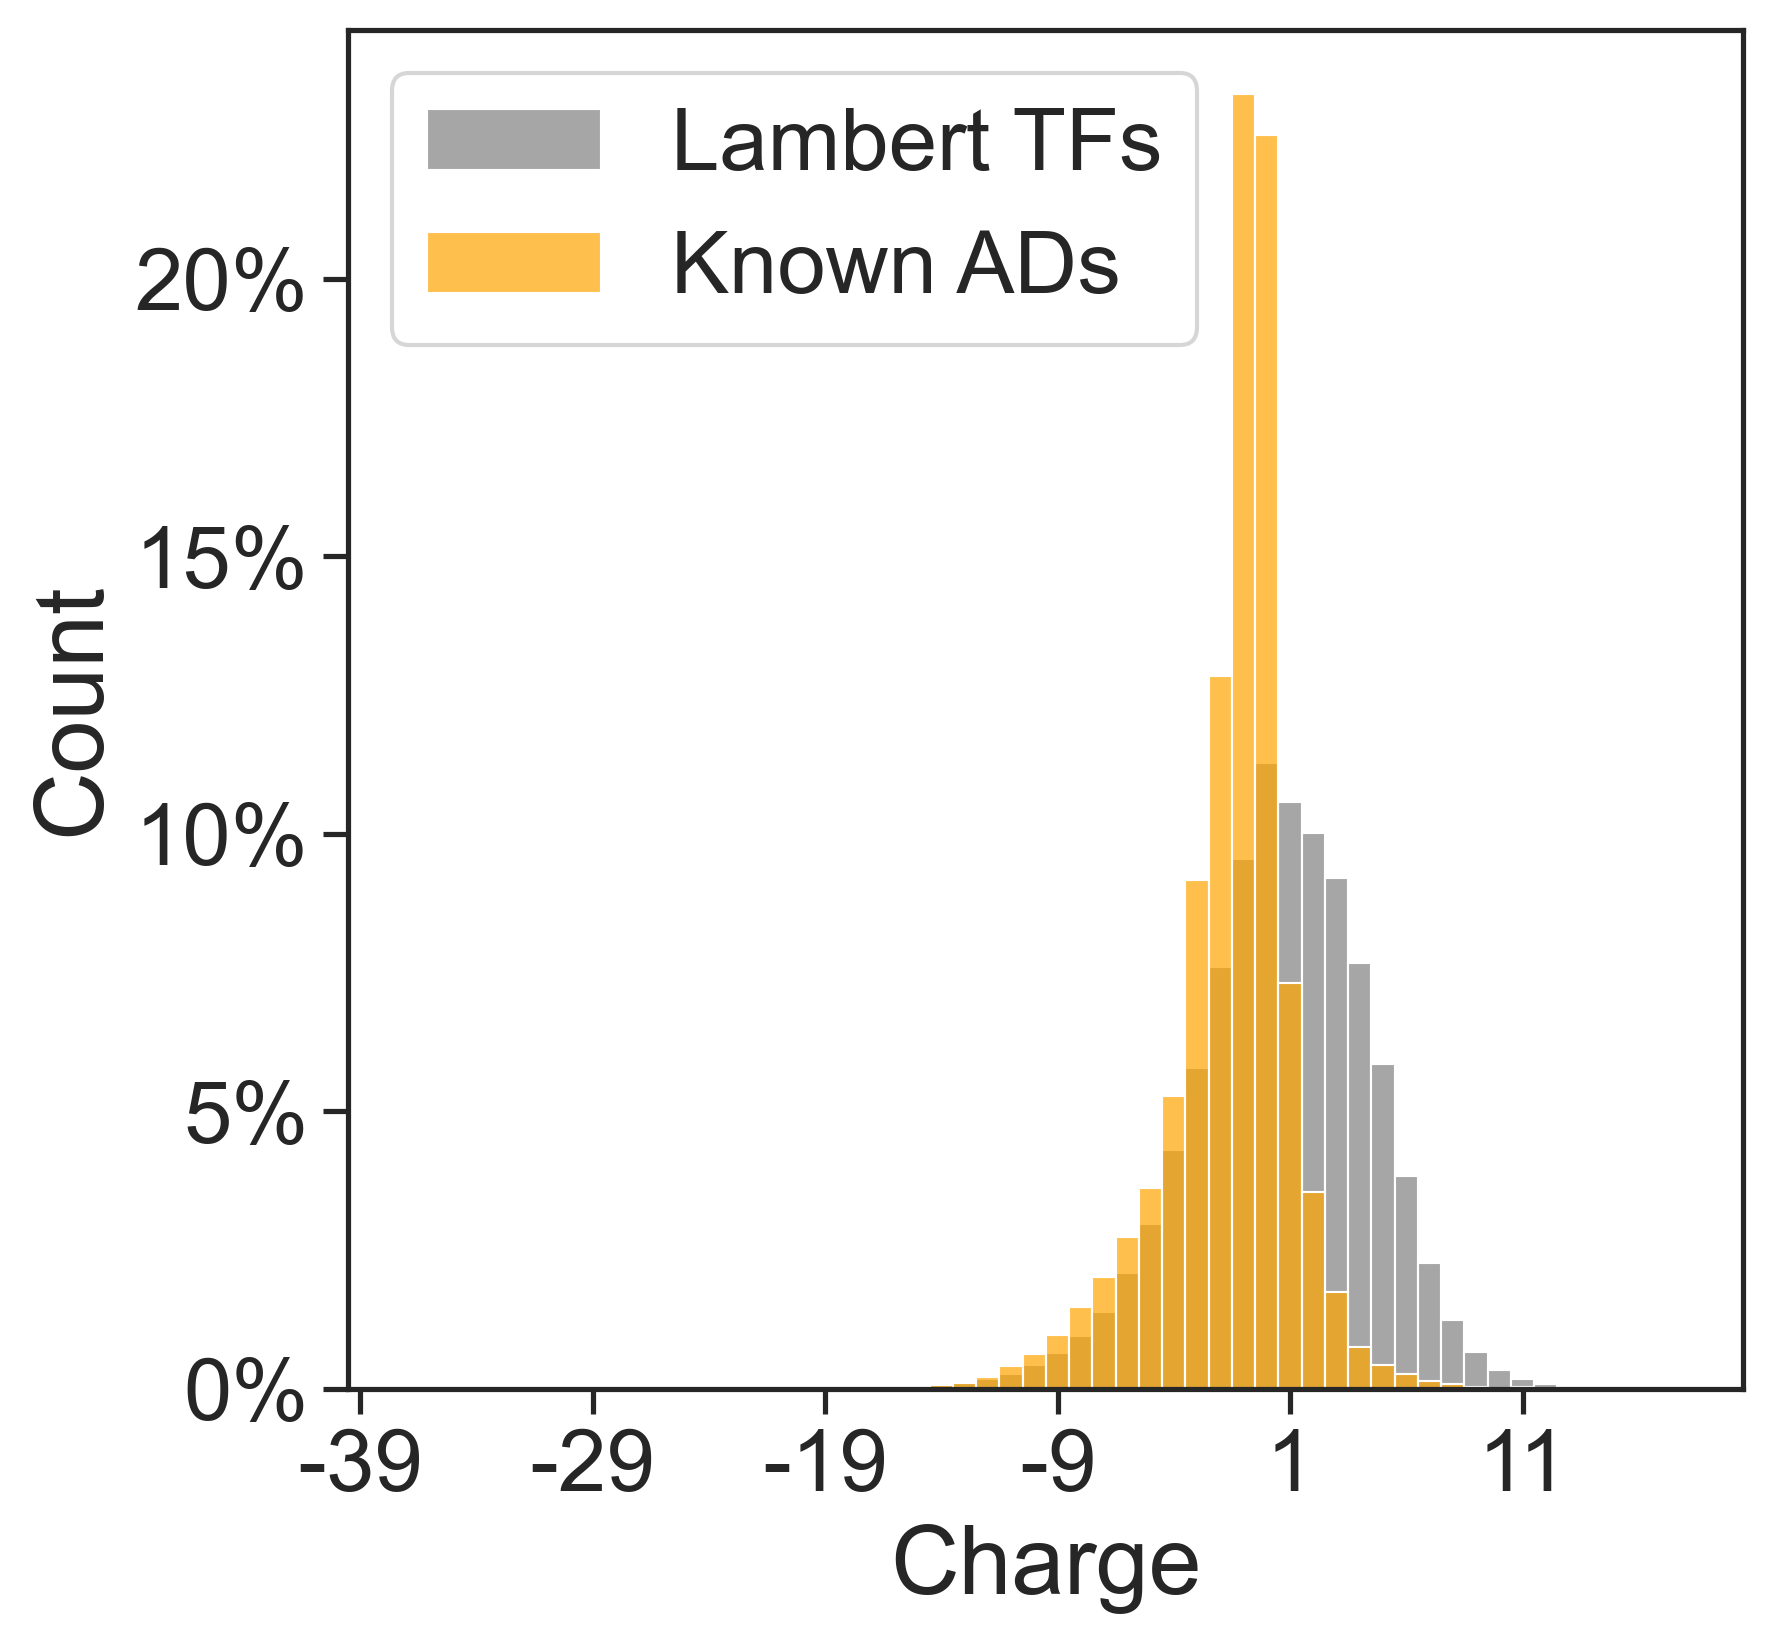

In [37]:
sns.set(style = "ticks", font_scale = 1.9)    
PlottingTools.tile_and_plot("Charge", tiled_Lambert, tiled_known_ADs, figsize=(6,6),
                            dpi = 300, xtick_interval = 10, xtick_labelsize = False, bins_interval = 1, 
                            ylabel = False, title = False, path_to_save = 'Figures/fig1/charge.png',
                           legend = True, xlabel = "Charge")

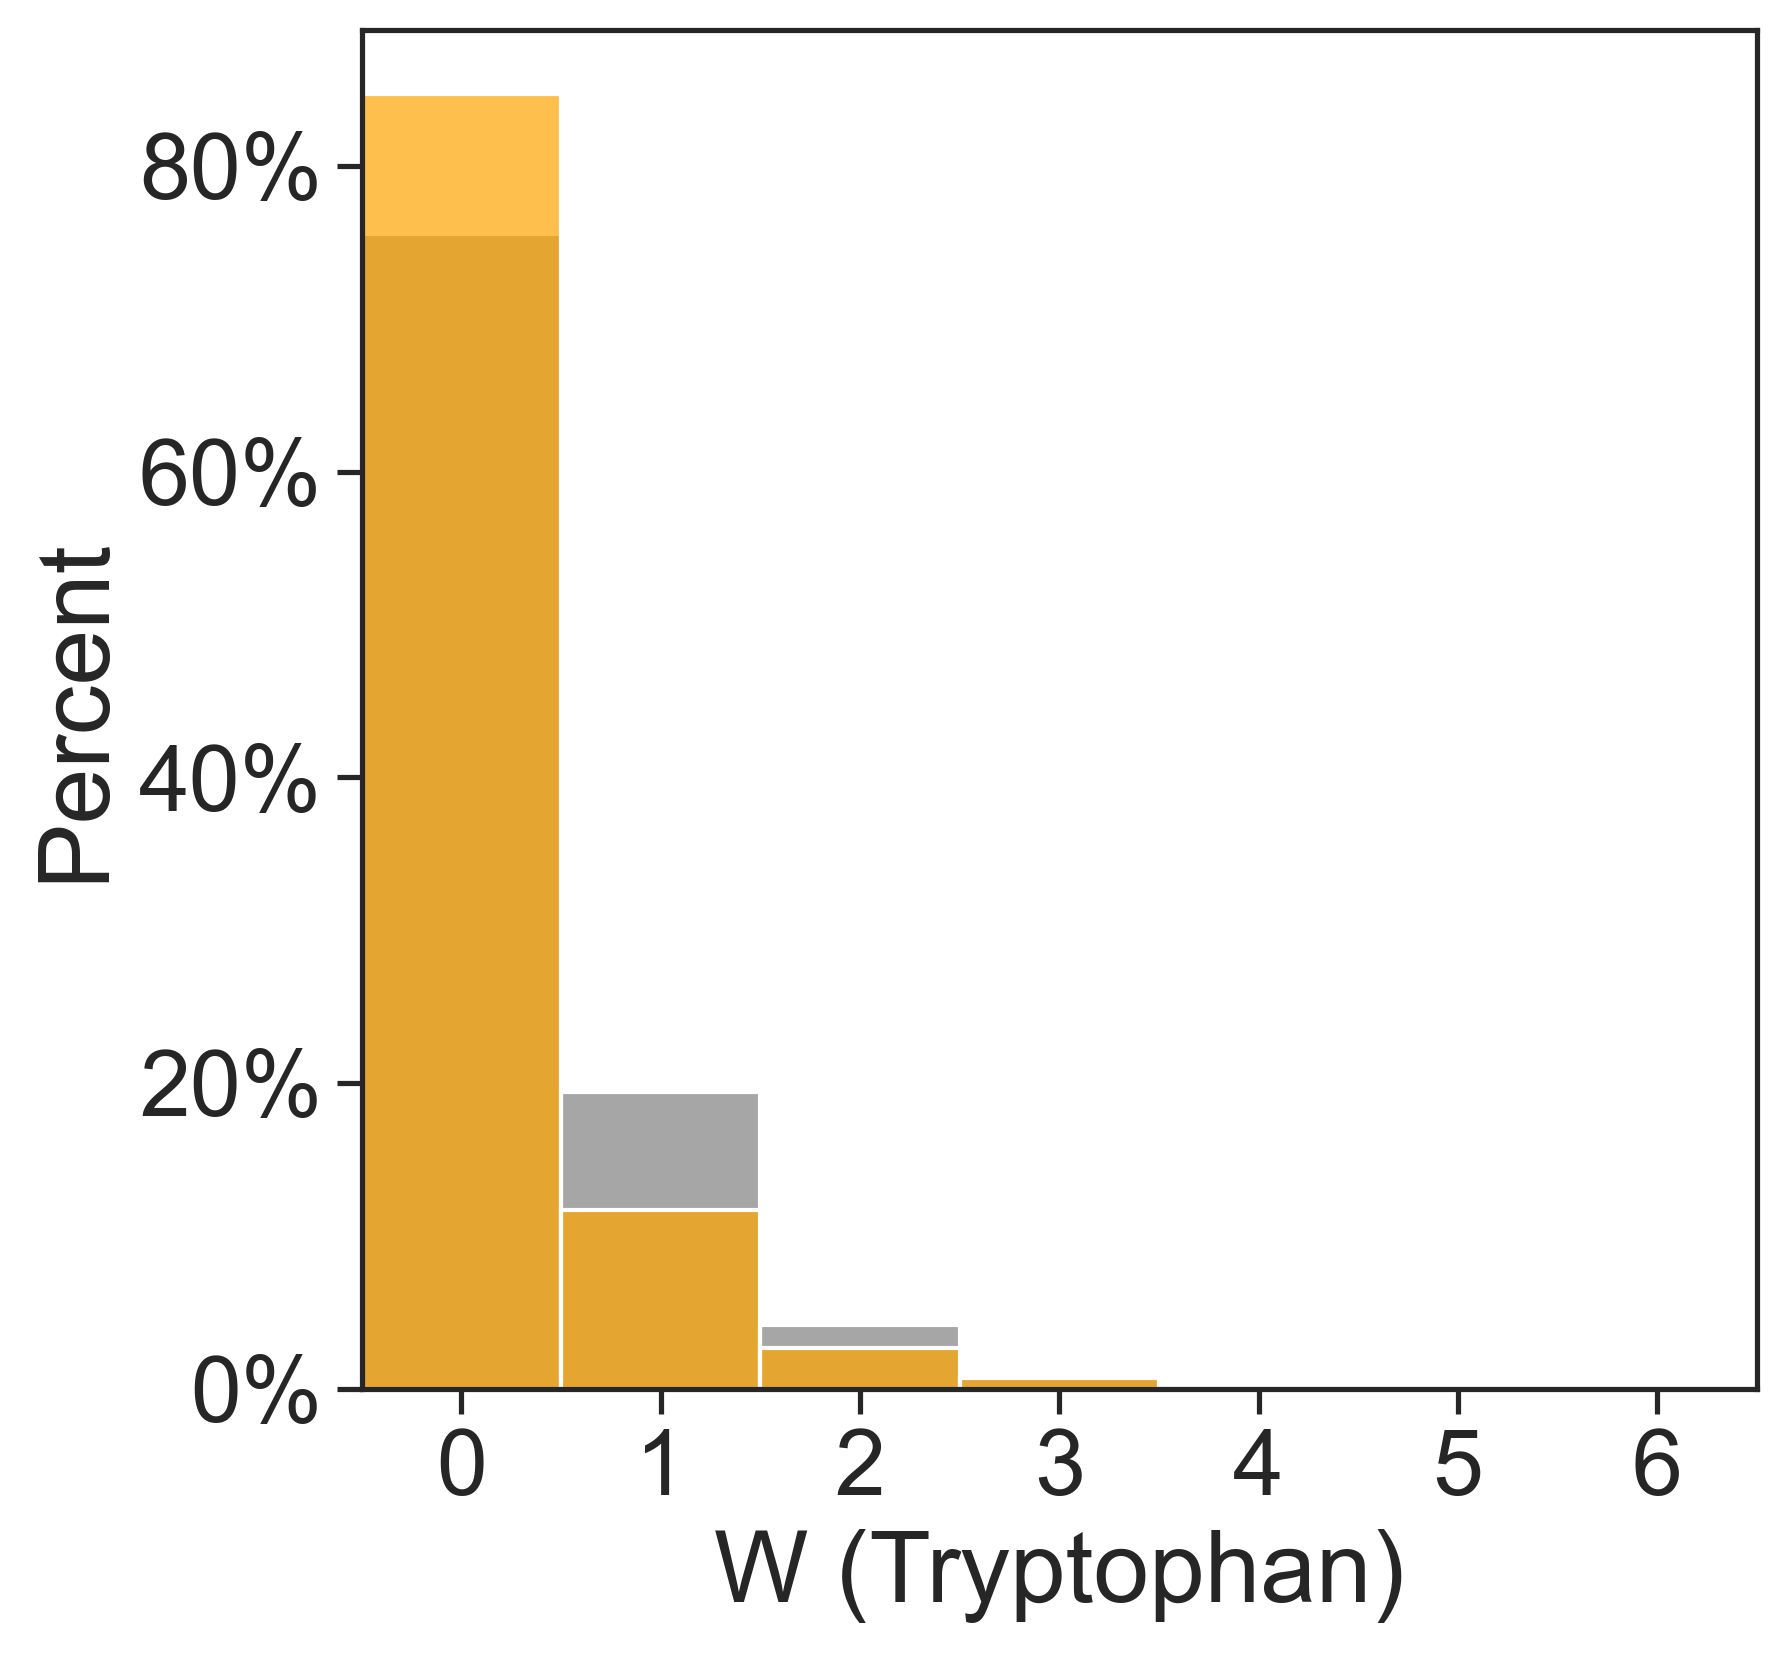

In [38]:
sns.set(style = "ticks", font_scale = 2)    
PlottingTools.tile_and_plot("W", tiled_Lambert, tiled_known_ADs, figsize=(6,6),
                            dpi = 300, xtick_interval = 1, xtick_labelsize = False, bins_interval = 1,
                           ylabel = True, title = False, path_to_save = 'Figures/fig1/W.png',
                           legend = False, xlabel = "W (Tryptophan)")

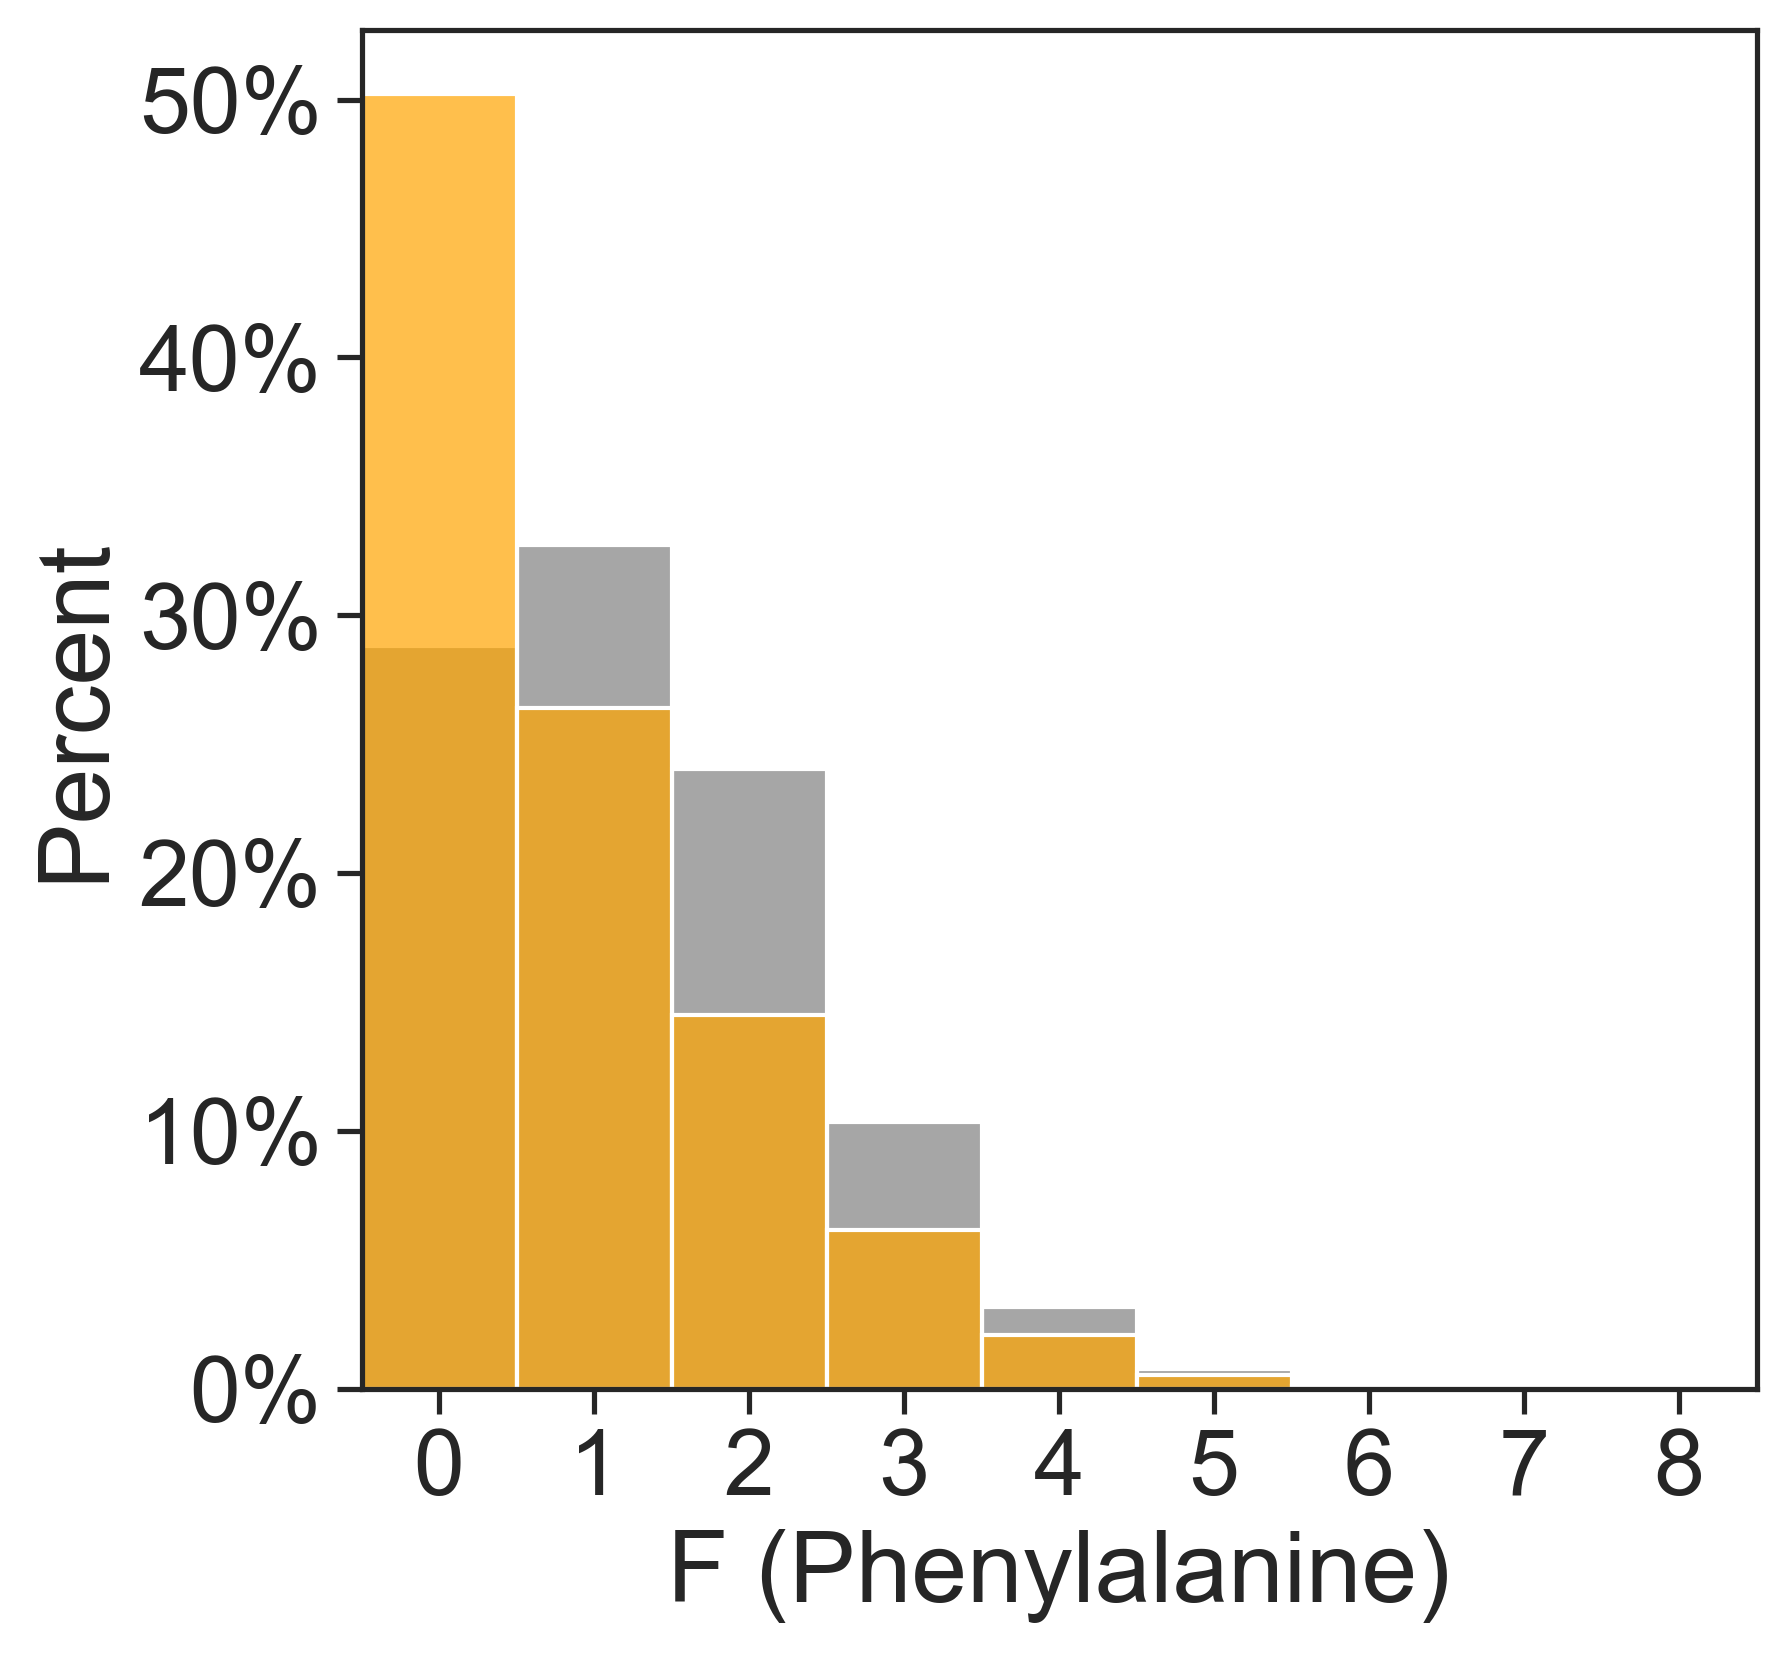

In [39]:
sns.set(style = "ticks", font_scale = 2)    
PlottingTools.tile_and_plot("F", tiled_Lambert, tiled_known_ADs, figsize=(6,6),
                            dpi = 300, xtick_interval = 1, xtick_labelsize = False, bins_interval = 1,
                           ylabel = True, title = False, path_to_save = 'Figures/fig1/F.png',
                           legend = False, xlabel = "F (Phenylalanine)")

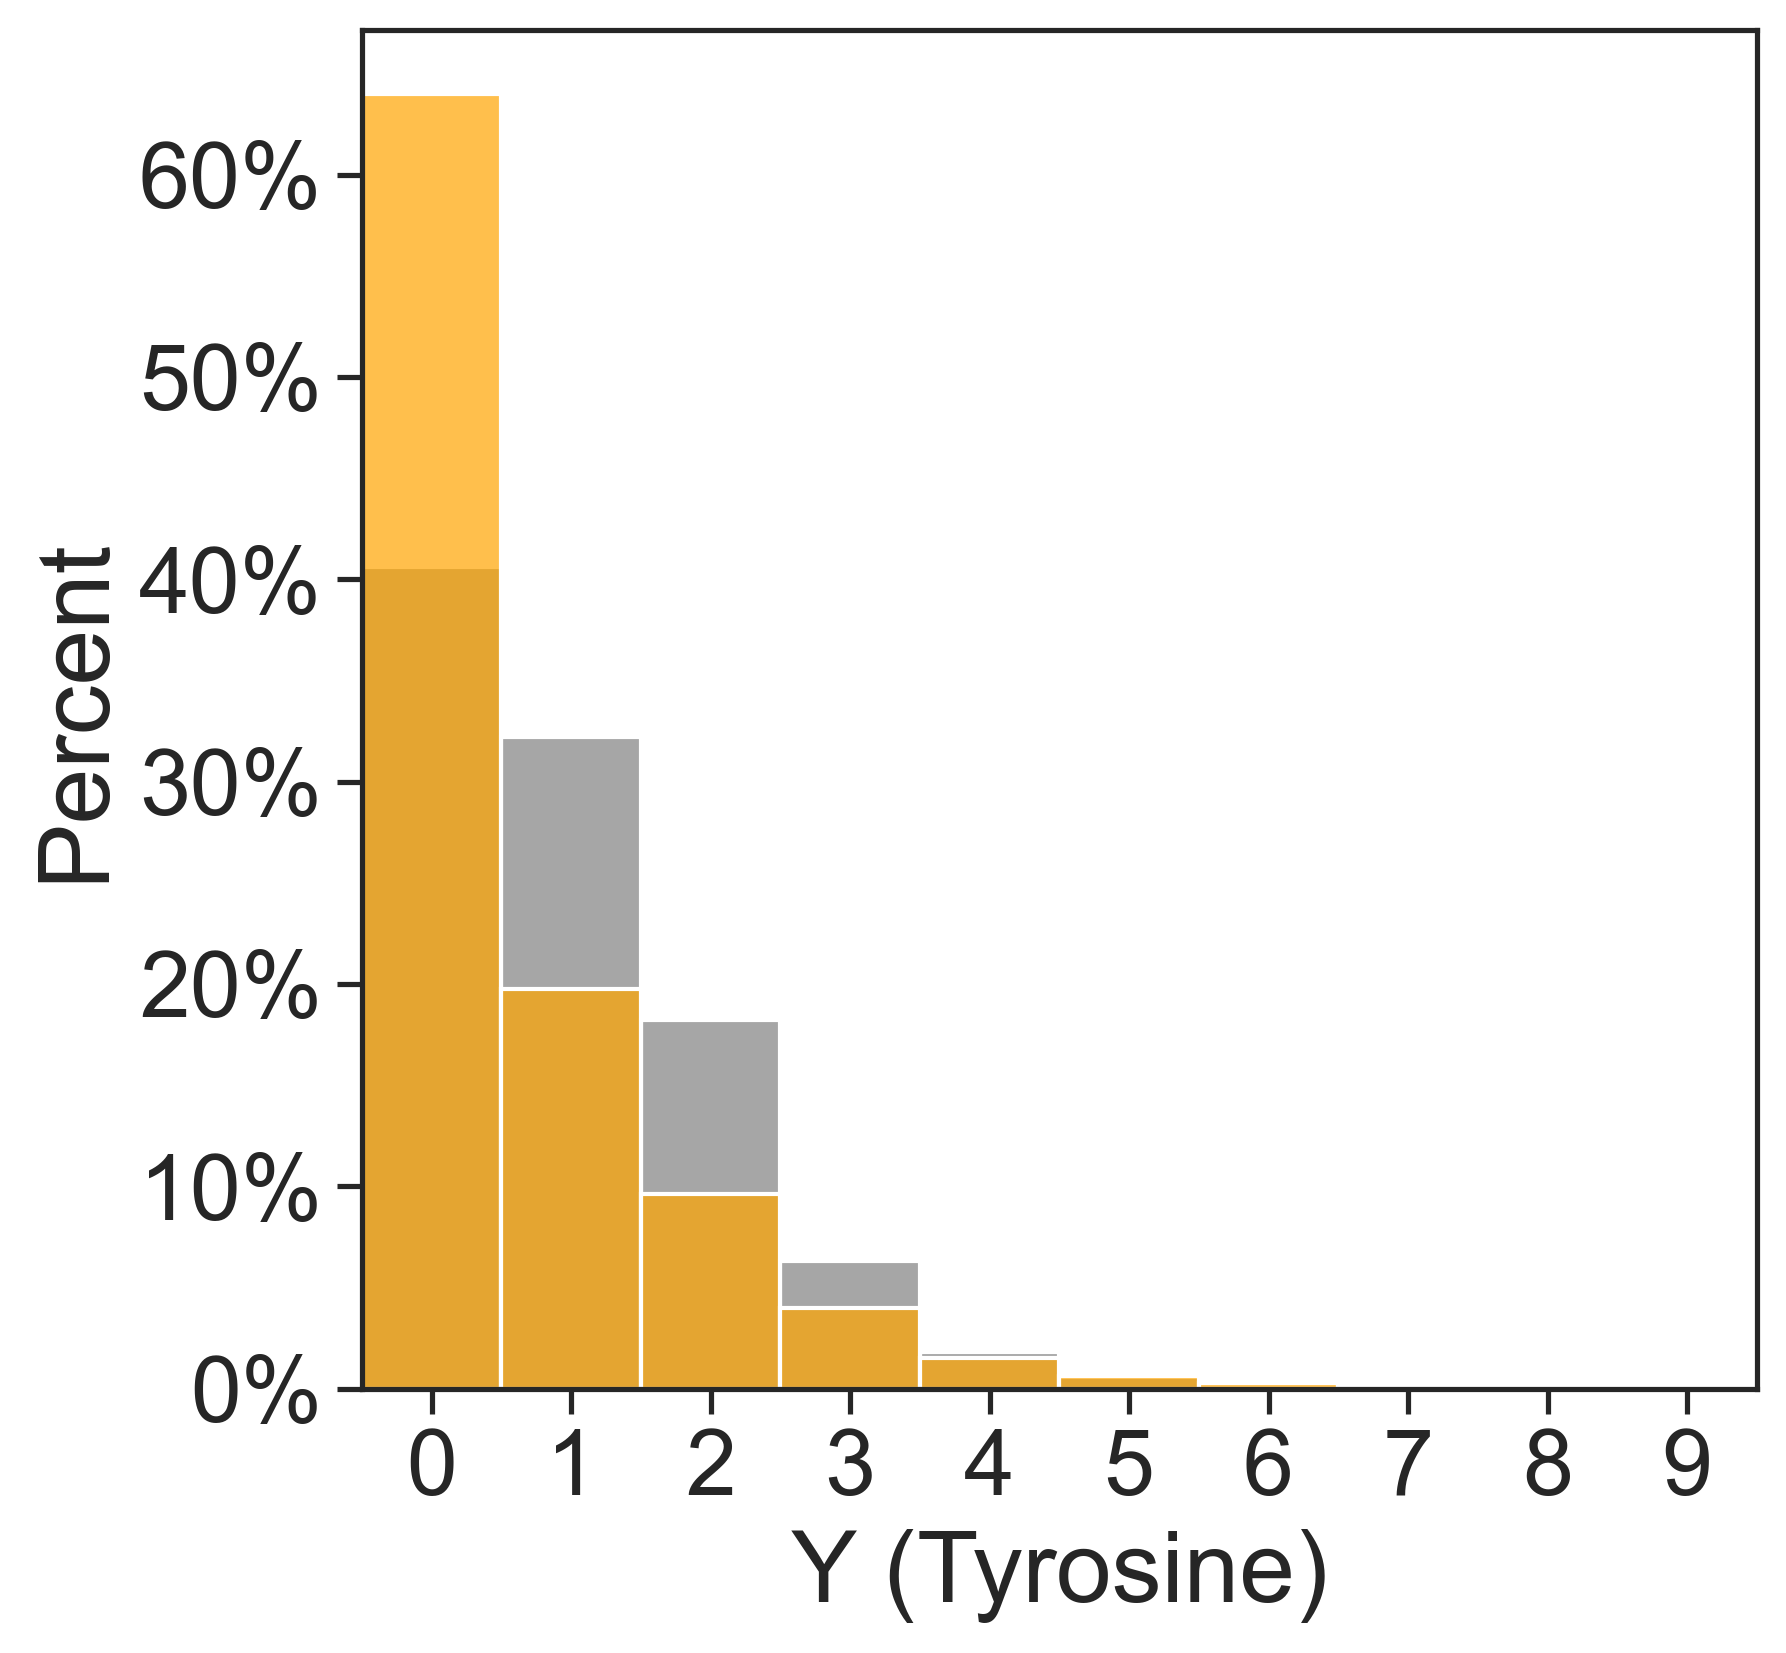

In [40]:
sns.set(style = "ticks", font_scale = 2)    
PlottingTools.tile_and_plot("Y", tiled_Lambert, tiled_known_ADs, figsize=(6,6),
                            dpi = 300, xtick_interval = 1, xtick_labelsize = False, bins_interval = 1,
                           ylabel = True, title = False, path_to_save = 'Figures/fig1/Y.png',
                           legend = False, xlabel = "Y (Tyrosine)")

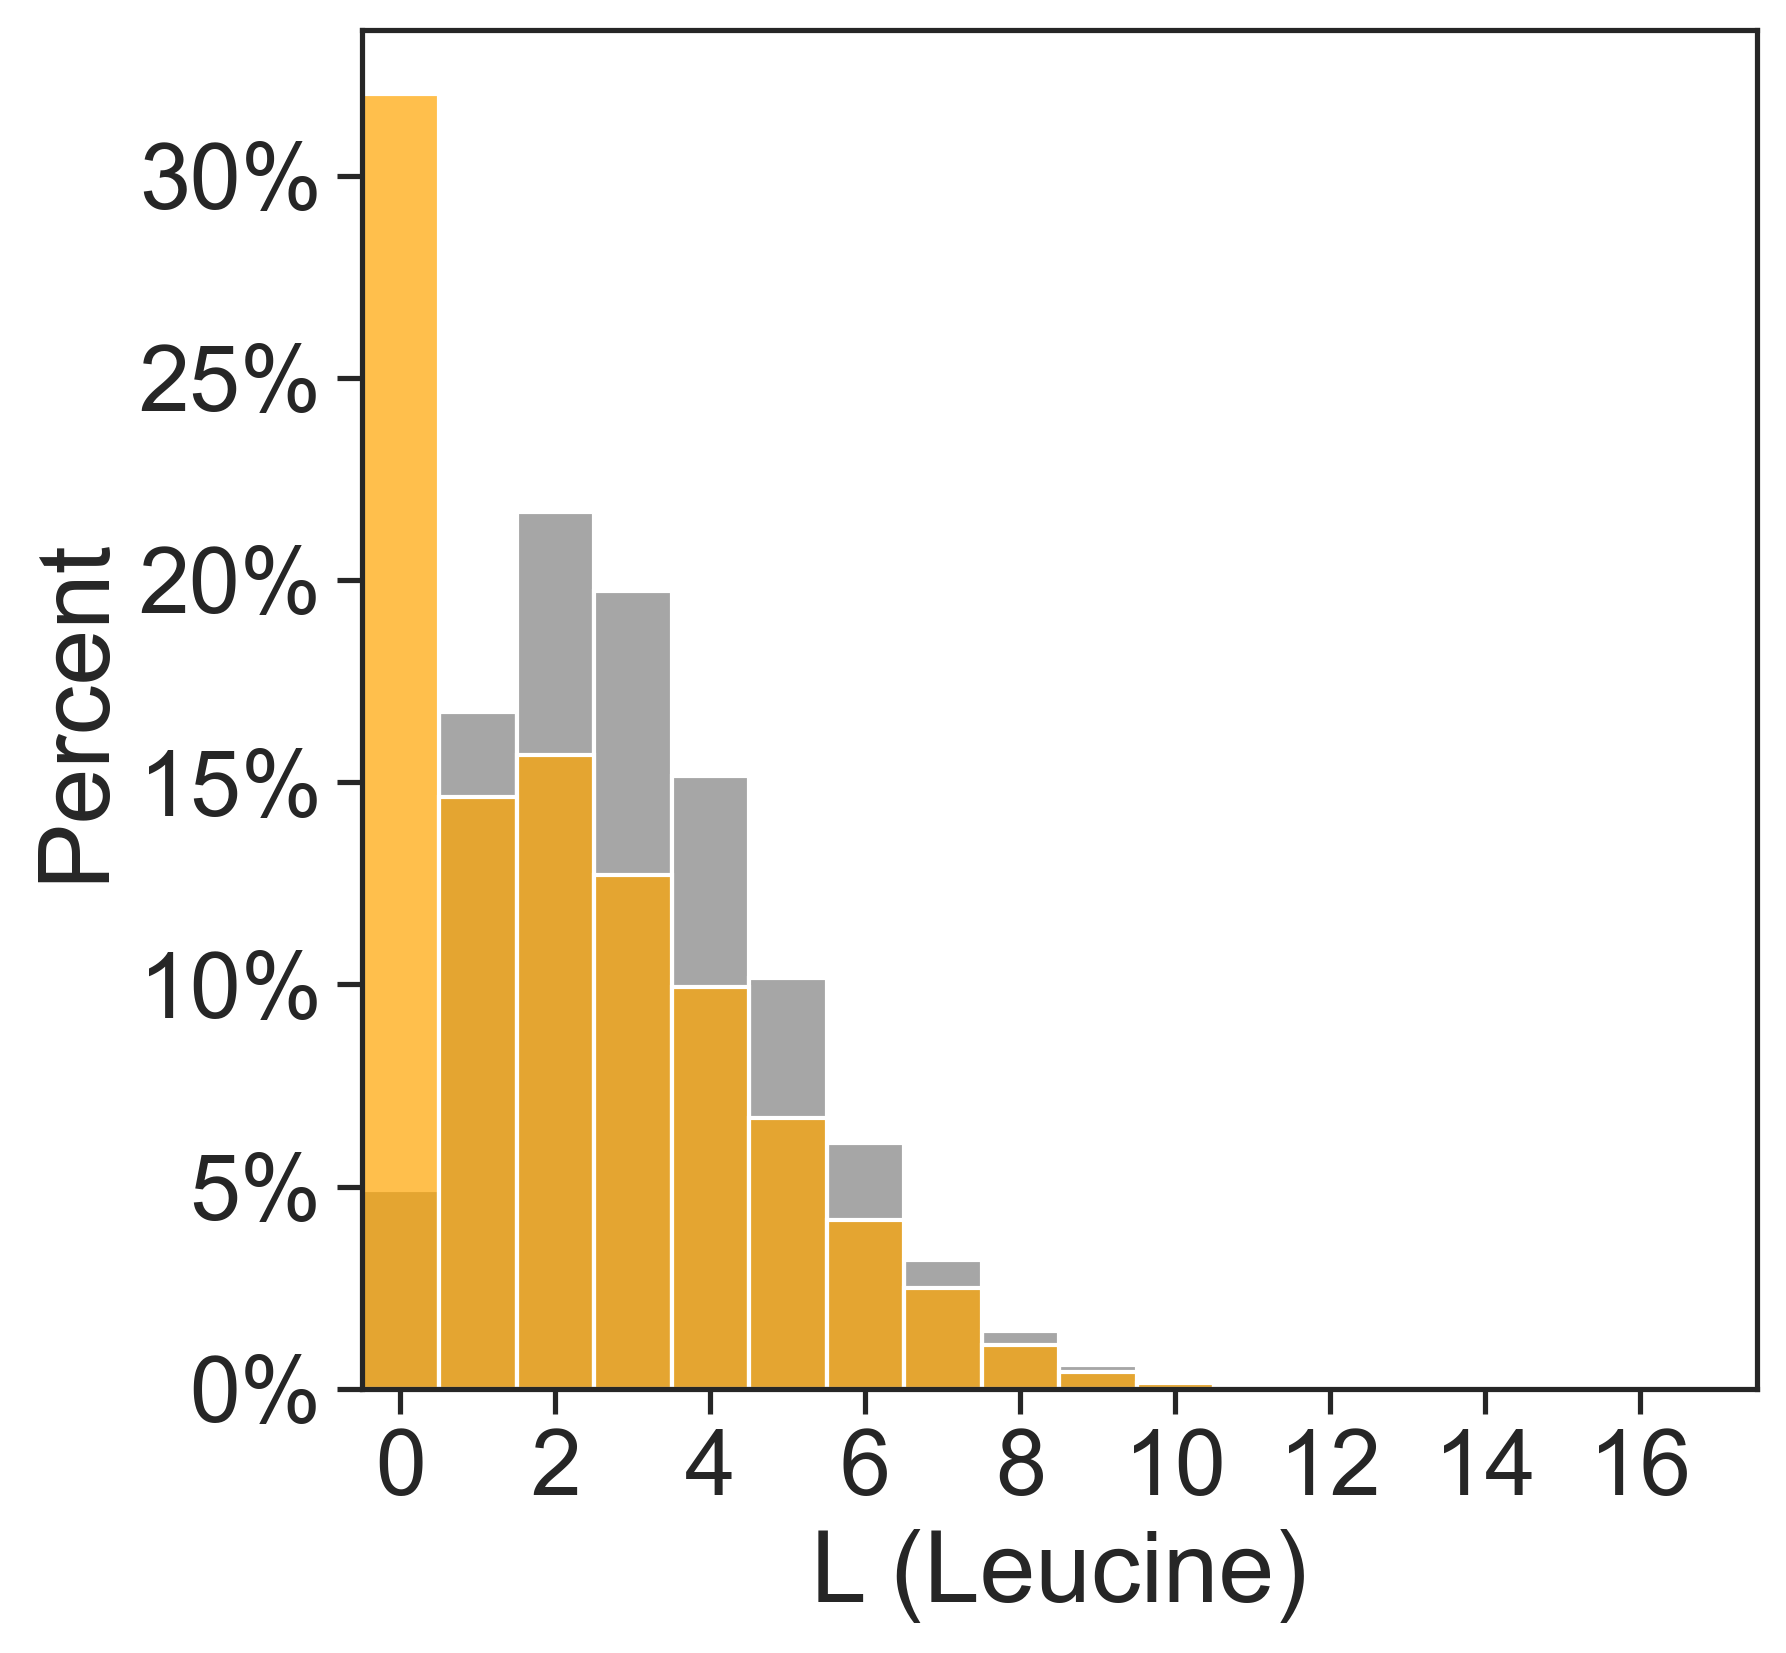

In [41]:
sns.set(style = "ticks", font_scale = 2)    
PlottingTools.tile_and_plot("L", tiled_Lambert, tiled_known_ADs, figsize=(6,6),
                            dpi = 300, xtick_interval = 2, xtick_labelsize = False, bins_interval = 1,
                           ylabel = True, title = False, path_to_save = 'Figures/fig1/L.png',
                           legend = False, xlabel = "L (Leucine)")

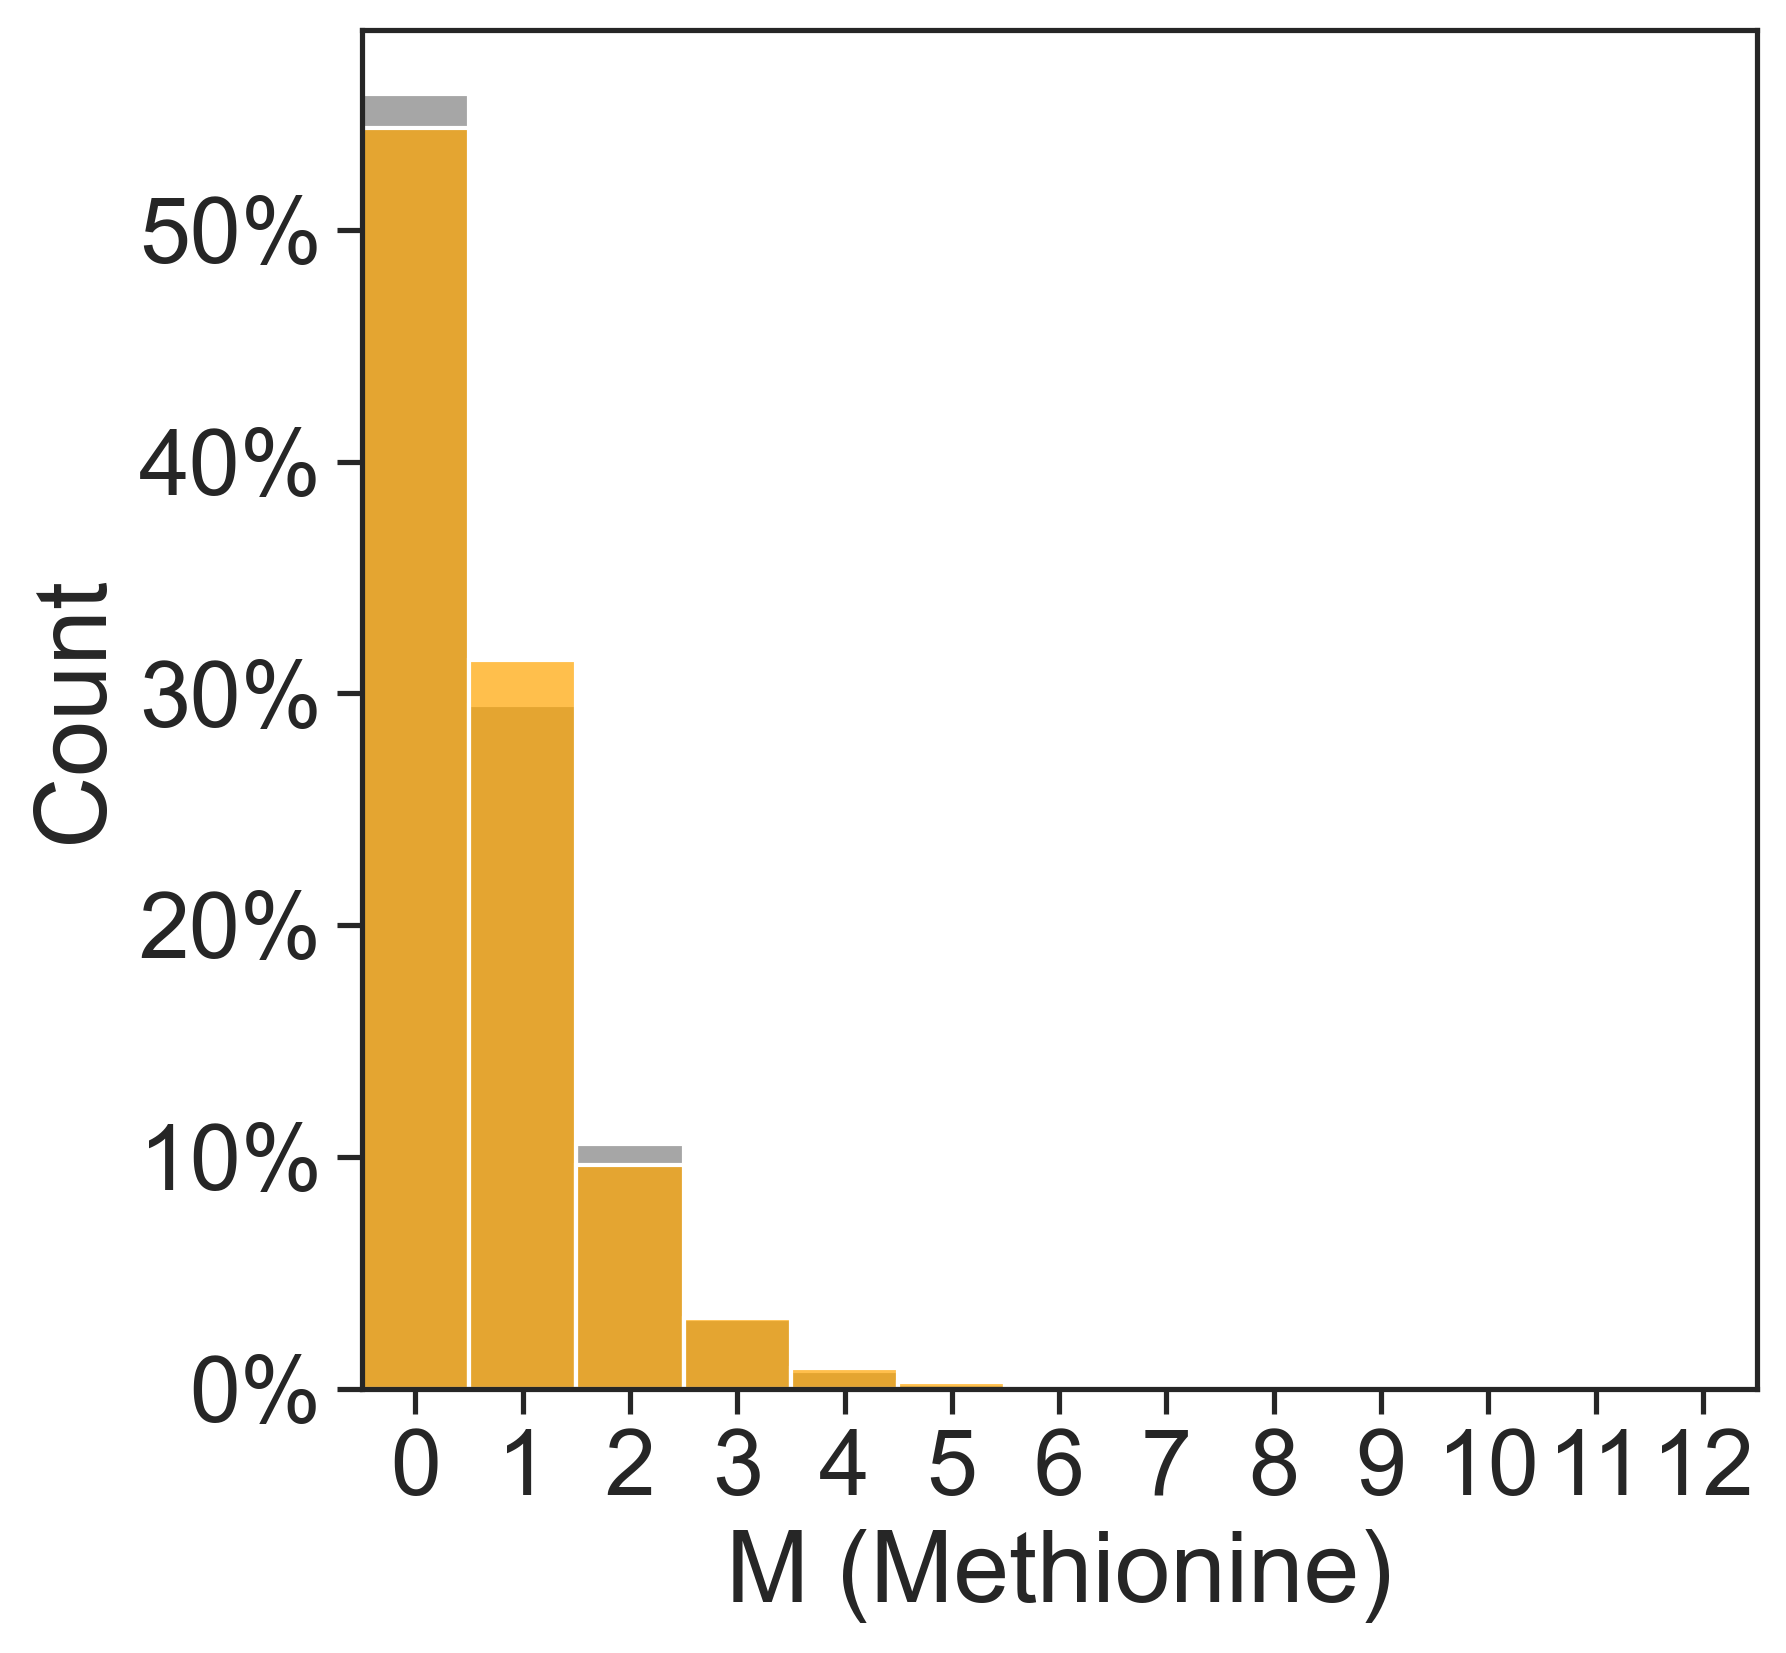

In [42]:
sns.set(style = "ticks", font_scale = 2)    
PlottingTools.tile_and_plot("M", tiled_Lambert, tiled_known_ADs, figsize=(6, 6),
                            dpi = 300, xtick_interval = 1, xtick_labelsize = False, bins_interval = 1,
                           ylabel = False, title = False, path_to_save = 'Figures/fig1/M.png',
                           legend = False, xlabel = "M (Methionine)")

In [15]:
# # ks_stats, ks_pvals = [],[]

# AAs=["A","I","L","M","V","F","W","Y","N","C","Q","S","T","D","E","R","H","K","G","P"]
# # AAs=["Q", "S", "P", "A"]


# for AA in AAs:
#     PlottingTools.tile_and_plot(AA, tiled_Lambert, tiled_GSL, figsize=(8,4),
#                             dpi = 200, xtick_interval = 2, xtick_labelsize = 12, bins_interval = 1,
#                                path_to_save = 'Figures/figS1/'+ AA + '.pdf')
#     #kstestresult = ks_2samp(tiled_Lambert[AA], GSL[AA], alternative ='two-sided', mode = 'auto')
#     #ks_stats.append(kstestresult[0])
#     #ks_pvals.append(kstestresult[1])
#     #print(kstestresult)
    
# # ks_table = pd.DataFrame({"AA" : AAs,
# #                        "statistic" : ks_stats,
# #                        "p-value" : ks_pvals})

Venn diagram: from http://localhost:8888/notebooks/Desktop/Staller_Lab/AD_predictor_project/Paper_AD_predictor/AD_predictor/notebooks/Acidic%2C%20P-rich%2C%20S-rich%20AD%20Known%20ADs%20Venn%20Diagram.ipynb

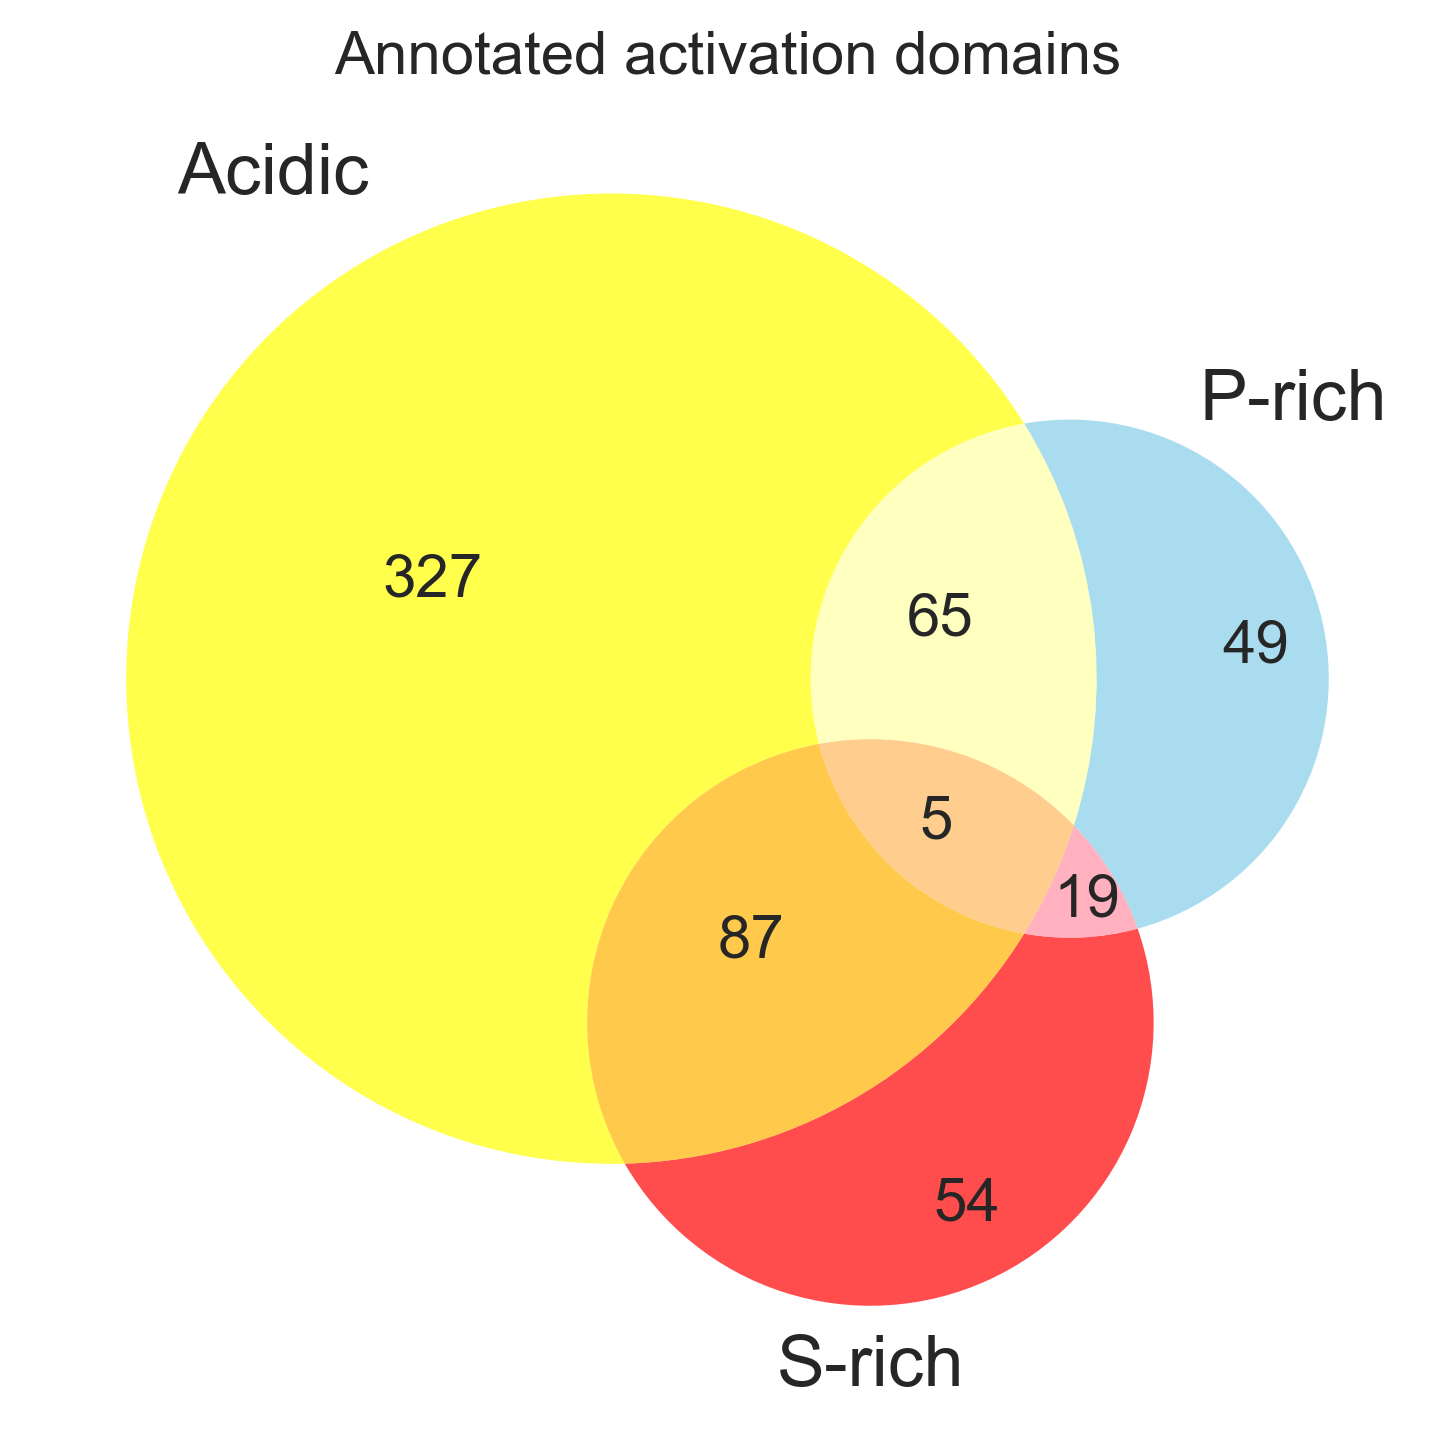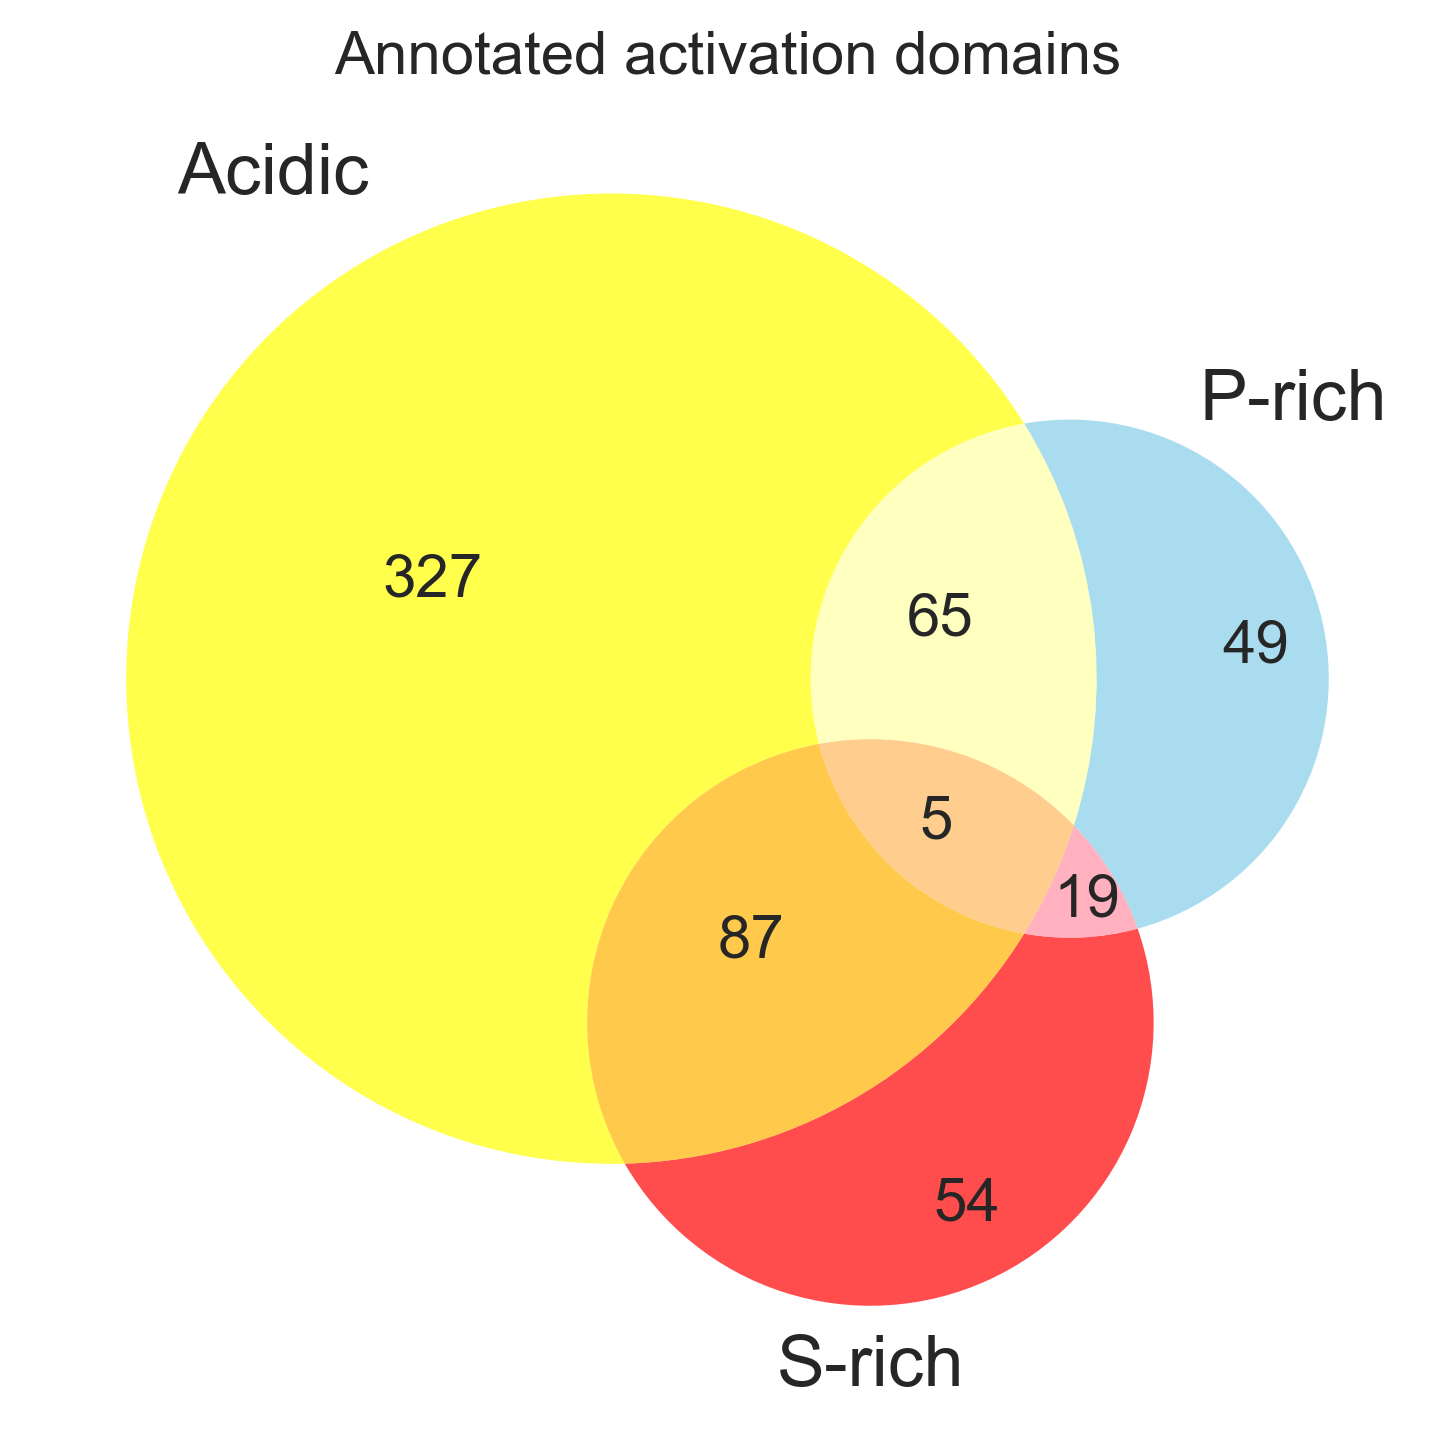

In [16]:
# Function to plot venn diagram
def plot_venn_d(A_df, B_df, C_df, labels = ('Group A', 'Group B', 'Group C'), set_colors=('darkviolet','deepskyblue','blue')):
    
    # Combining overlapping sequences from 3 dataframes 
    
    for df in [A_df, B_df, C_df]:
        # Temporarily adding list column to use return_merged_list function
        df["List"] = ""
       
    # Dataframe of combined sequences
    concat_sequences = pd.concat([A_df, B_df, C_df])[["Start", "End", "uniprotID"]]
    
    for df in [A_df, B_df, C_df]:
        # Dropping temporary list column
        df = df.drop(columns = "List")
        
    # Comparing each entry in combined sequence dataframe to the 3 individual dataframes
    AD_comparison_tools.add_col_contains_prediction(concat_sequences, A_df, result_col_name="contained_in_A")
    AD_comparison_tools.add_col_contains_prediction(concat_sequences, B_df, result_col_name="contained_in_B")
    AD_comparison_tools.add_col_contains_prediction(concat_sequences, C_df, result_col_name="contained_in_C")

    # Indices of rows containing sequences in df A B or C
    A = set(concat_sequences.index[concat_sequences['contained_in_A']].tolist())
    B = set(concat_sequences.index[concat_sequences['contained_in_B']].tolist())
    C = set(concat_sequences.index[concat_sequences['contained_in_C']].tolist())
        
    # Counting overlaps for Venn-D
    # Source for lines 29 - 54: https://towardsdatascience.com/professional-venn-diagrams-in-python-638abfff39cc
    AB_overlap = A & B  #compute intersection of set A & set B
    AC_overlap = A & C
    BC_overlap = B & C
    ABC_overlap = A & B & C
    
    A_rest = A - AB_overlap - AC_overlap 
    B_rest = B - AB_overlap - BC_overlap
    C_rest = C - AC_overlap - BC_overlap

    AB_only = AB_overlap - ABC_overlap   
    AC_only = AC_overlap - ABC_overlap
    BC_only = BC_overlap - ABC_overlap

    sets = Counter()               #set order A, B, C   
    sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
    sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
    sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
    sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
    sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
    sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
    sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
    
    ax = plt.gca() 
    venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
          set_colors,alpha=0.7)    

In [17]:
# Stanford = knownADs[knownADs["Reference"].str.contains("DelRosso")]
# Soto = knownADs[knownADs["Reference"].str.contains("Soto")]
# uniprot = knownADs[(knownADs["Reference"].str.contains("R4TA_regions.txt")) | (knownADs["Reference"].str.contains("transcriptionalactivity_regions.txt"))]

In [18]:
# plot_venn_d(Stanford, Soto, uniprot, 
#             labels = ('Stanford', 'Soto', 'uniprot'), 
#             set_colors=('Red','Blue','Orange'))

In [47]:
knownADs[knownADs["uniprotID"].str.contains("-")]

,Gene,Start,End,uniprotID,Matching Isoforms,Canonical Transcript ID,orig_uniprotID,Reference,TileType,ProteinRegionSeq,Notes,Length,D,E,R,K,charge
32,ATF7,1,296,P17544-1,[['P17544-1']],NaN,P17544,"activation_regions.txt, GSL",TF,MGDDRPFVCNAPGCGQRFTNEDHLAVHKHKHEMTLKFGPARTDSVI...,NaN,296,12,16,10,17,-1
71,CREB1,1,253,P16220-1,[['P16220-1']],NaN,P16220,"PMID: 8394325, Soto",TF,MTMESGAENQQSGDAAVTEAENQQMTVQAQPQIATLAQVSMPAAHA...,NaN,253,10,14,7,5,-12
102,EBF3,429,551,Q9H4W6-2,[['Q9H4W6-2']],NaN,Q9H4W6-2,"PMID: 28017370, Soto",TF,NSFSSQLAVNVSETSQANDQVGYSRNTSSVSPRGYVPSSTPQQSNY...,NaN,123,1,1,3,2,3
328,MEF2B,170,368,Q02080-2,[['Q02080-2']],NaN,Q02080-2,"PMID: 8668199, Soto",TF,FRPAAPKAGPPGLVHPLFSPSHLTSKTPPPLYLPTEGRRSDLPGGL...,NaN,199,5,6,14,4,7
332,MEIS2,340,470,O14770-4,[['O14770-4']],NaN,O14770-4,"PMID: 20553494, Soto",TF,DQSNRAVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQSMPGDYV...,NaN,131,5,1,3,0,-3
338,MITF,212,301,O75030-2,[['O75030-2']],ENST00000352241,O75030,DelRosso et al.,TF,MNTHSRASCMQMDDVIDDIISLESSYNEEILGLMDPALQMANTLPV...,NaN,90,6,6,3,1,-8
407,NFYC,149,335,Q13952-2,[['Q13952-2']],NaN,Q13952-2,"PMID: 8662945, Soto",TF,AQQPTAVQVQGQQQGQQTTSSTTTIQPGQIIIAQPQQGQTTPVTMQ...,NaN,187,4,3,1,0,-6
423,NR1H4,12,111,Q96RI1-2,[['Q96RI1-2']],ENST00000548884,Q96RI1,DelRosso et al.,TF,HLPTTDEFSFSENLFGVLTEQVAGPLGQNLEVEPYSQYSNVQFPQV...,NaN,100,1,12,2,2,-9
524,RARB,1,80,P10826-2,[['P10826-2']],NaN,P10826-2,"PMID: 8389696, Soto",TF,MFDCMDVLSVSPGQILDFYTASPSSCMLQEKALKACFSGLTQTEWQ...,NaN,80,3,5,2,3,-3
525,RARB,147,448,P10826-2,[['P10826-2']],NaN,P10826-2,"PMID: 8389696, Soto",TF,SKESVRNDRNKKKKETSKQECTESYEMTAELDDLTEKIRKAHQETF...,NaN,302,17,25,15,23,-4


In [46]:
len(knownADs[knownADs["uniprotID"].str.contains("-")])

16